In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [61]:
# Set up the different data paths
ROOT = "c:/Users/summe/Git Repos/ml-agricultural-census-utah"
DATA_DIR = os.path.join(ROOT, "initial_analysis")
DATASET_PREDICT = os.path.join(DATA_DIR, "wheat_prod_unlabeled.csv")
DATASET_LABELED = os.path.join(DATA_DIR, "wheat_prod_labeled.csv")

# Show the current paths 
print("ROOT: ", ROOT)
print("DATA_DIR: ", DATA_DIR)
print("DATASET_PREDICT: ", DATASET_PREDICT)
print("DATASET_LABELED: ", DATASET_LABELED)

ROOT:  c:/Users/summe/Git Repos/ml-agricultural-census-utah
DATA_DIR:  c:/Users/summe/Git Repos/ml-agricultural-census-utah\initial_analysis
DATASET_PREDICT:  c:/Users/summe/Git Repos/ml-agricultural-census-utah\initial_analysis\wheat_prod_unlabeled.csv
DATASET_LABELED:  c:/Users/summe/Git Repos/ml-agricultural-census-utah\initial_analysis\wheat_prod_labeled.csv


In [62]:
# Preview the unlabelled dataset
df_predict = pd.read_csv(DATASET_PREDICT)
df_predict.head()

,year,county,countyansi,wheatprod,pop,wheatprice,wheatprice_l1,wheatprice_l2,precipitation,maximum_temperature,...,county23,county24,county25,county26,county27,year1,year2,year3,year4,year5
0,2002,beaver,1,NaN,6058,4.65,3.30,3.25,7.80,64.400002,...,0,0,0,0,0,1,0,0,0,0
1,2007,beaver,1,NaN,6266,8.30,4.85,3.80,9.84,64.599998,...,0,0,0,0,0,0,1,0,0,0
2,2017,beaver,1,NaN,6402,5.20,4.30,5.18,11.37,65.400002,...,0,0,0,0,0,0,0,0,1,0
3,2022,beaver,1,NaN,7327,9.15,7.10,5.43,10.76,64.500000,...,0,0,0,0,0,0,0,0,0,1
4,2002,carbon,7,NaN,20114,4.65,3.30,3.25,9.84,58.000000,...,0,0,0,0,0,1,0,0,0,0


In [63]:
# preview the labeled dataset
df_labeled = pd.read_csv(DATASET_LABELED)
df_labeled.head()

,year,county,countyansi,wheatprod,pop,wheatprice,wheatprice_l1,wheatprice_l2,precipitation,maximum_temperature,...,county23,county24,county25,county26,county27,year1,year2,year3,year4,year5
0,2012,beaver,1,53666,6500,9.59,8.26,7.43,11.54,65.400002,...,0,0,0,0,0,0,0,1,0,0
1,2002,box elder,3,1921384,44038,4.65,3.30,3.25,9.29,60.099998,...,0,0,0,0,0,1,0,0,0,0
2,2007,box elder,3,2879583,47193,8.30,4.85,3.80,8.83,62.599998,...,0,0,0,0,0,0,1,0,0,0
3,2012,box elder,3,2798821,50205,9.59,8.26,7.43,9.25,63.400002,...,0,0,0,0,0,0,0,1,0,0
4,2017,box elder,3,2713277,53999,5.20,4.30,5.18,13.17,61.099998,...,0,0,0,0,0,0,0,0,1,0


In [64]:
#show the dataset column names
print("Predict dataset columns: ", df_predict.columns)

Predict dataset columns:  Index(['year', 'county', 'countyansi', 'wheatprod', 'pop', 'wheatprice',
       'wheatprice_l1', 'wheatprice_l2', 'precipitation',
       'maximum_temperature', 'palmer_modified_drought_index_pm',
       'average_temperature', 'palmer_zindex', 'minimum_temperature',
       'palmer_hydrological_drought_inde', 'palmer_drought_severity_index_pd',
       'heating_degree_days', 'cooling_degree_days', 'precipitation_l1',
       'precipitation_l2', 'allindustrytotal', 'privateindustries',
       'agricultureforestryfishingandhun', 'miningquarryingandoilandgasextra',
       'utilities', 'construction', 'manufacturing',
       'durablegoodsmanufacturing', 'nondurablegoodsmanufacturing',
       'wholesaletrade', 'retailtrade', 'transportationandwarehousing',
       'information', 'financeinsurancerealestaterental',
       'financeandinsurance', 'realestateandrentalandleasing',
       'professionalandbusinessservices', 'professionalscientificandtechnic',
       'manageme

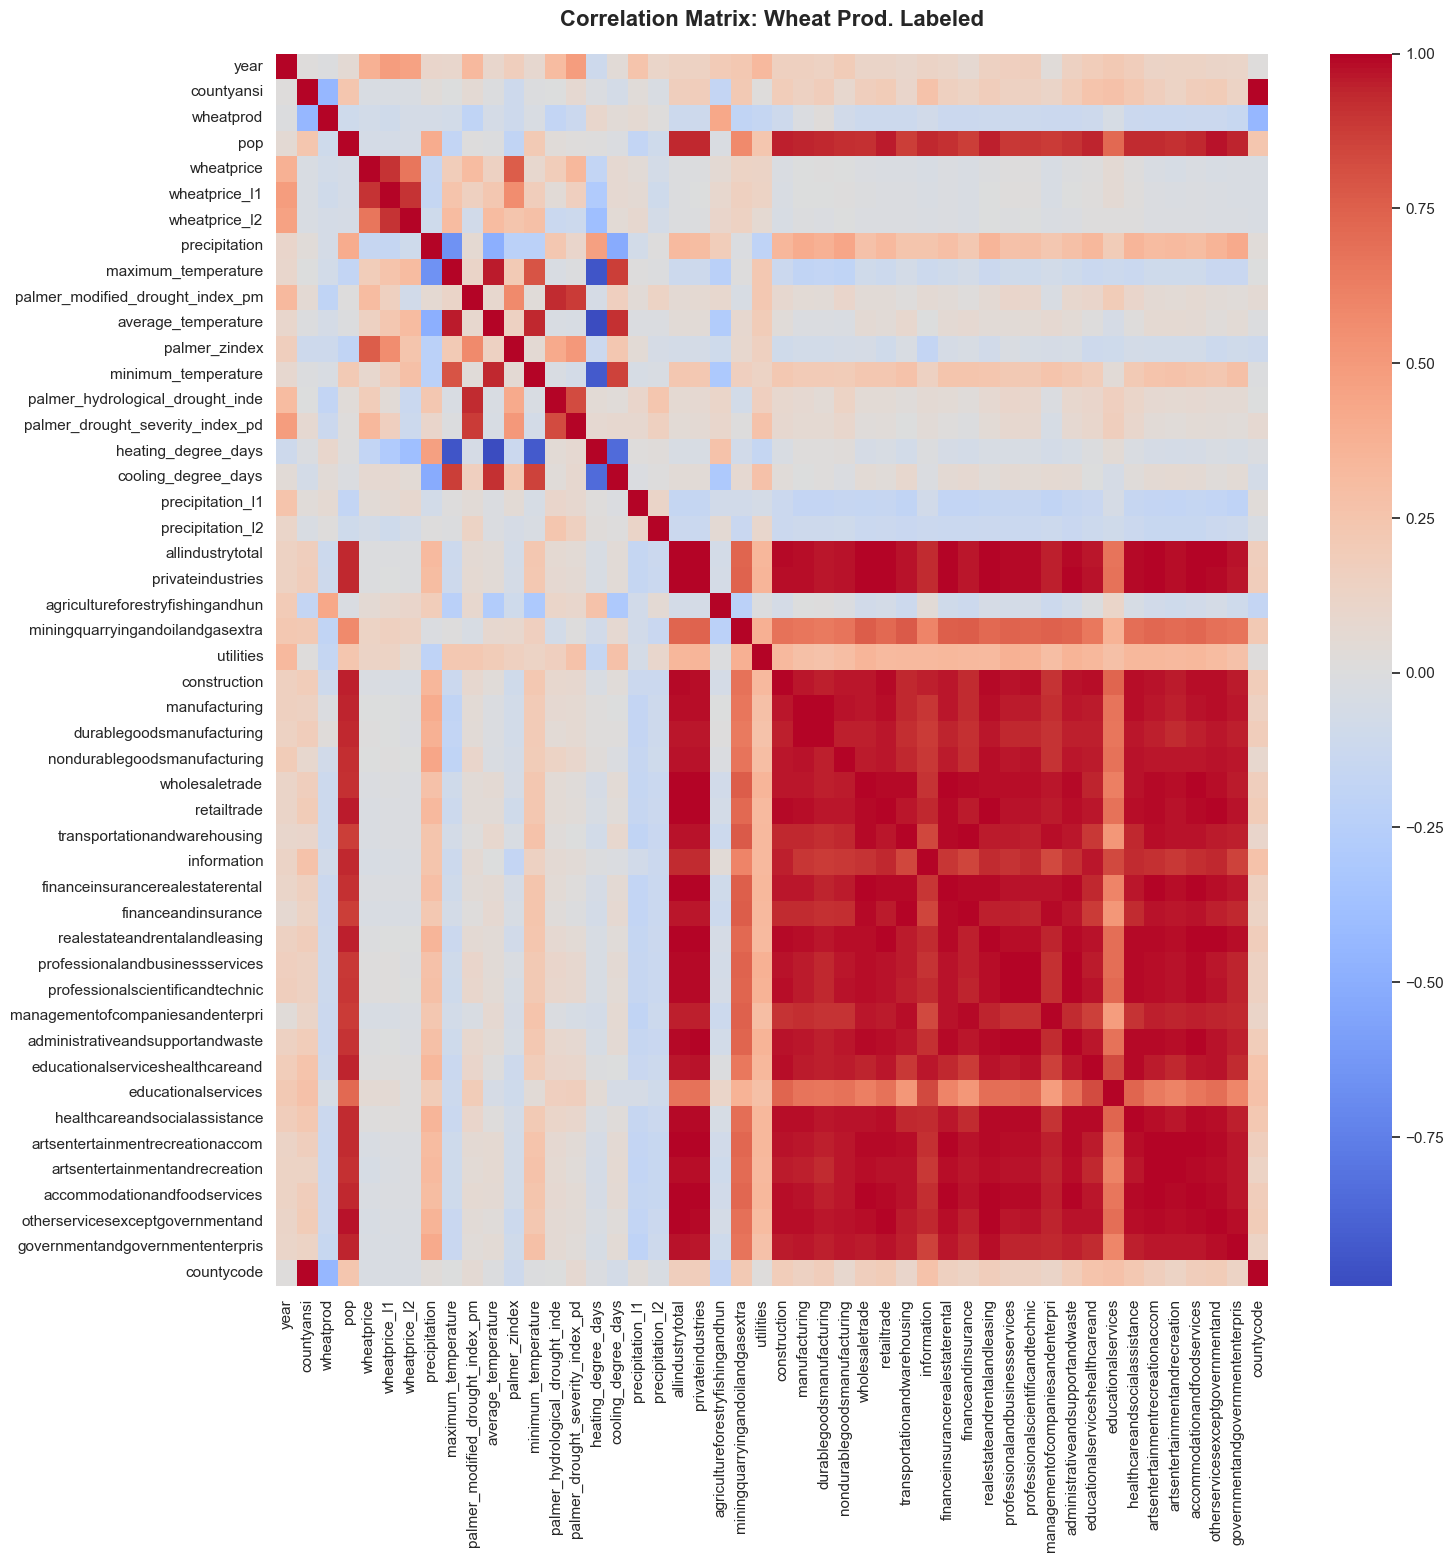

In [65]:
# show the correlation matrix for the labeled dataset
corr = df_labeled.iloc[:,:49].drop(columns='county').corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Matrix: Wheat Prod. Labeled", fontsize=16, fontweight='bold', pad=20)
plt.show()

In [66]:
df_labeled

,year,county,countyansi,wheatprod,pop,wheatprice,wheatprice_l1,wheatprice_l2,precipitation,maximum_temperature,...,county23,county24,county25,county26,county27,year1,year2,year3,year4,year5
0,2012,beaver,1,53666,6500,9.59,8.26,7.43,11.540000,65.400002,...,0,0,0,0,0,0,0,1,0,0
1,2002,box elder,3,1921384,44038,4.65,3.30,3.25,9.290000,60.099998,...,0,0,0,0,0,1,0,0,0,0
2,2007,box elder,3,2879583,47193,8.30,4.85,3.80,8.830000,62.599998,...,0,0,0,0,0,0,1,0,0,0
3,2012,box elder,3,2798821,50205,9.59,8.26,7.43,9.250000,63.400002,...,0,0,0,0,0,0,0,1,0,0
4,2017,box elder,3,2713277,53999,5.20,4.30,5.18,13.170000,61.099998,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2002,weber,57,98023,203045,4.65,3.30,3.25,20.709999,56.900002,...,0,0,0,0,1,1,0,0,0,0
66,2007,weber,57,166724,217567,8.30,4.85,3.80,21.930000,59.299999,...,0,0,0,0,1,0,1,0,0,0
67,2012,weber,57,255650,236268,9.59,8.26,7.43,21.440001,60.200001,...,0,0,0,0,1,0,0,1,0,0
68,2017,weber,57,98200,251474,5.20,4.30,5.18,32.060001,59.299999,...,0,0,0,0,1,0,0,0,1,0


In [116]:
# show the top 10 correlated features to wheatprod but dont count wheatprod itself
print(corr['wheatprod'].sort_values(ascending=False).iloc[1:11])


agricultureforestryfishingandhun    0.428926
heating_degree_days                 0.091217
precipitation_l1                    0.064762
cooling_degree_days                 0.039098
durablegoodsmanufacturing           0.023481
precipitation_l2                    0.013395
year                               -0.010097
manufacturing                      -0.013323
minimum_temperature                -0.031137
educationalservices                -0.043765
Name: wheatprod, dtype: float64


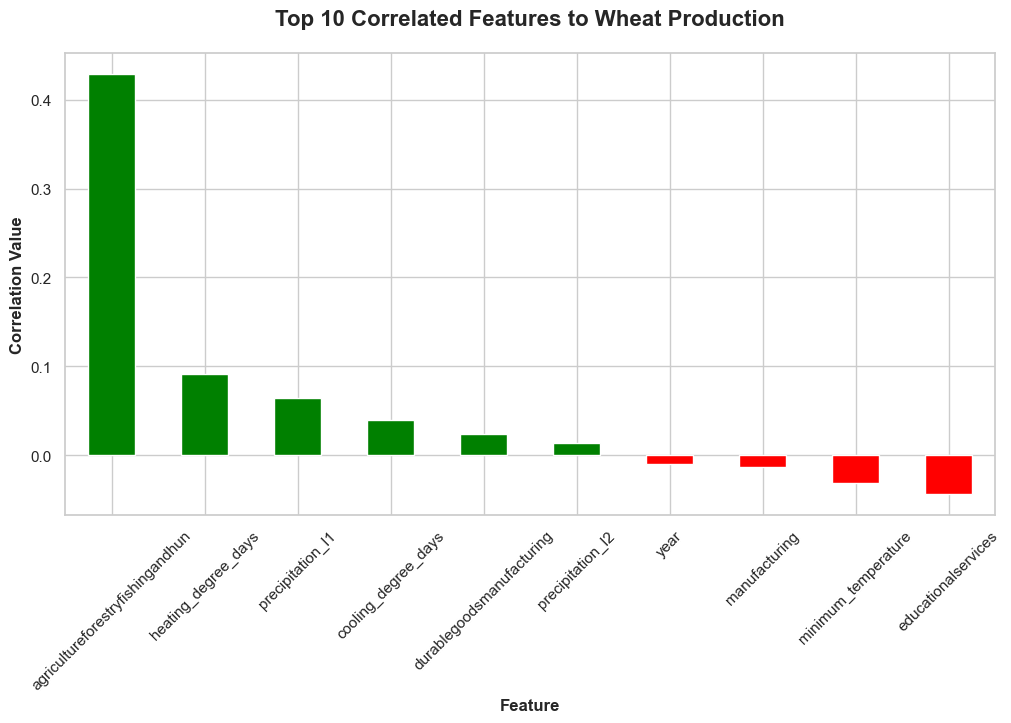

In [121]:
# plot bar graph of the top 10 correlated features make the bar green if the correlation is postive and red if negative
top_10_corr = corr['wheatprod'].sort_values(ascending=False).iloc[1:11]
plt.figure(figsize=(12,6))
colors = ['red' if c < 0 else 'green' for c in top_10_corr.values]
top_10_corr.plot(kind='bar', color=colors)
plt.title("Top 10 Correlated Features to Wheat Production", fontsize=16, fontweight='bold', pad=20)
plt.ylabel("Correlation Value", fontsize=12, fontweight='bold')
plt.xlabel("Feature", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


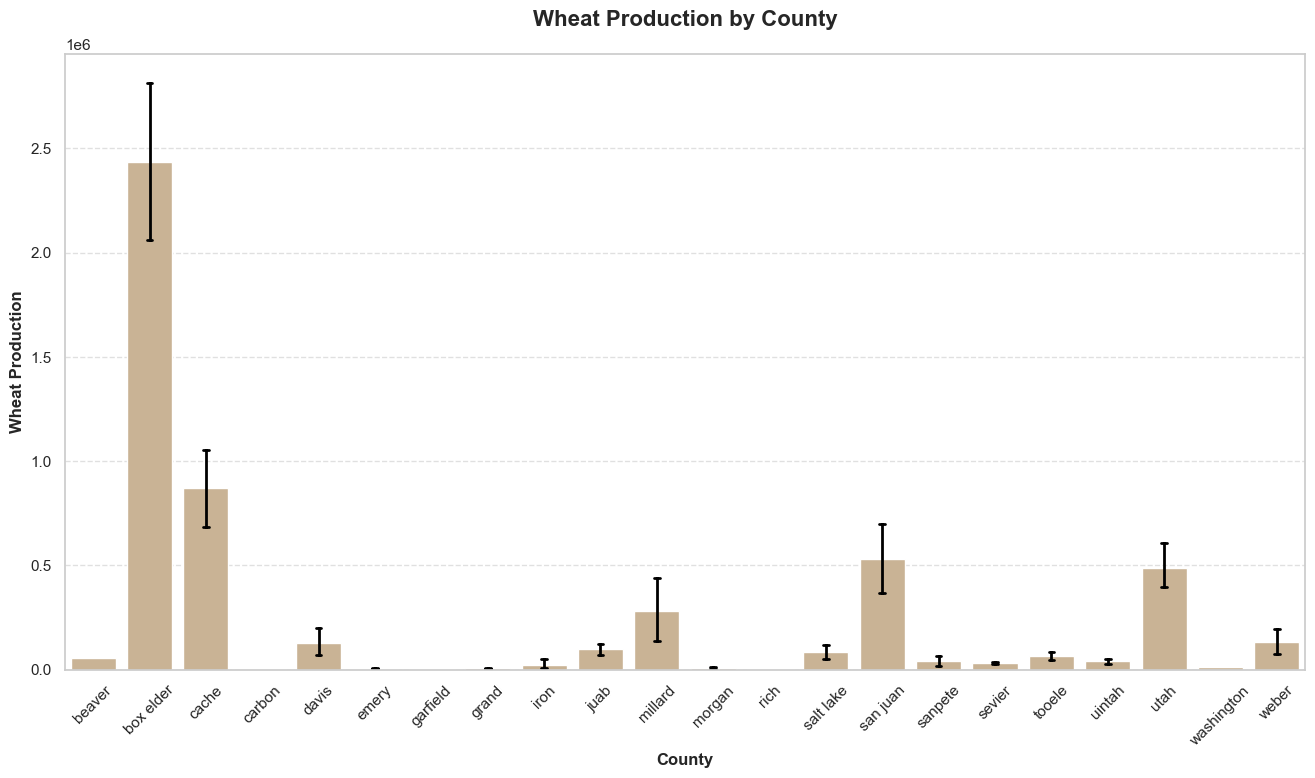

In [122]:
#create a bar graph of each county and their wheat production by year
plt.figure(figsize=(16,8))
sns.barplot(x='county', y='wheatprod', data=df_labeled, color='tan', err_kws={'color': 'black', 'linewidth':2}, capsize=0.1)
plt.title("Wheat Production by County", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("County", fontsize=12, fontweight='bold')
plt.ylabel("Wheat Production", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


C:\Users\summe\AppData\Local\Temp\ipykernel_19220\1827273297.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(utah.geometry.centroid.x, utah.geometry.centroid.y, utah['name']):


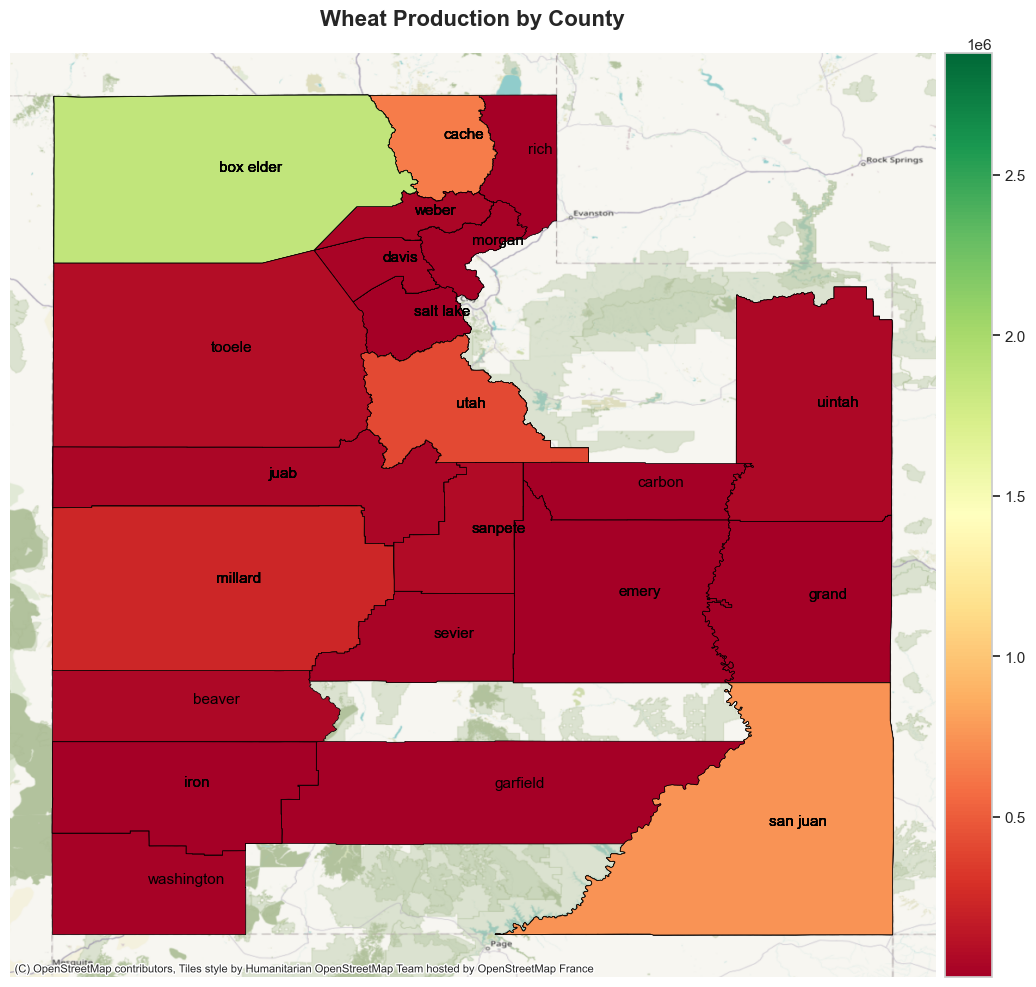

In [179]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx

# Load the GeoJSON file
utah = gpd.read_file("georef-united-states-of-america-county.geojson")
utah = utah.to_crs(epsg=4326)
#add a column to the geopandas dataframe that is the county name in lowercase 
for i in range(len(utah)):
    utah.at[i, 'name'] = utah.at[i, 'coty_name'][0].lower()
# Merge the GeoJSON file with the labeled dataset
utah = utah.merge(df_labeled, left_on='name', right_on='county')

# Set alpha value
alpha_value = 0.5

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
utah.plot(column='wheatprod', ax=ax, legend=True, cax=cax, cmap='RdYlGn', aspect='equal', edgecolor='black', linewidth=0.5)

ax.set_title("Wheat Production by County", fontsize=16, fontweight='bold', pad=20)
# add county names
for x, y, label in zip(utah.geometry.centroid.x, utah.geometry.centroid.y, utah['name']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=11, color='black')
# add a basemap
ctx.add_basemap(ax, crs=utah.crs)
ax.axis('off')

plt.show()






In [131]:
print(utah.head())  # Check the first few rows of the DataFrame
print(len(utah))    # Check the length of the DataFrame


Empty GeoDataFrame
Columns: [admin_level, boundary, name, ref, way_area, geometry, year, county, countyansi, wheatprod, pop, wheatprice, wheatprice_l1, wheatprice_l2, precipitation, maximum_temperature, palmer_modified_drought_index_pm, average_temperature, palmer_zindex, minimum_temperature, palmer_hydrological_drought_inde, palmer_drought_severity_index_pd, heating_degree_days, cooling_degree_days, precipitation_l1, precipitation_l2, allindustrytotal, privateindustries, agricultureforestryfishingandhun, miningquarryingandoilandgasextra, utilities, construction, manufacturing, durablegoodsmanufacturing, nondurablegoodsmanufacturing, wholesaletrade, retailtrade, transportationandwarehousing, information, financeinsurancerealestaterental, financeandinsurance, realestateandrentalandleasing, professionalandbusinessservices, professionalscientificandtechnic, managementofcompaniesandenterpri, administrativeandsupportandwaste, educationalserviceshealthcareand, educationalservices, healthcare

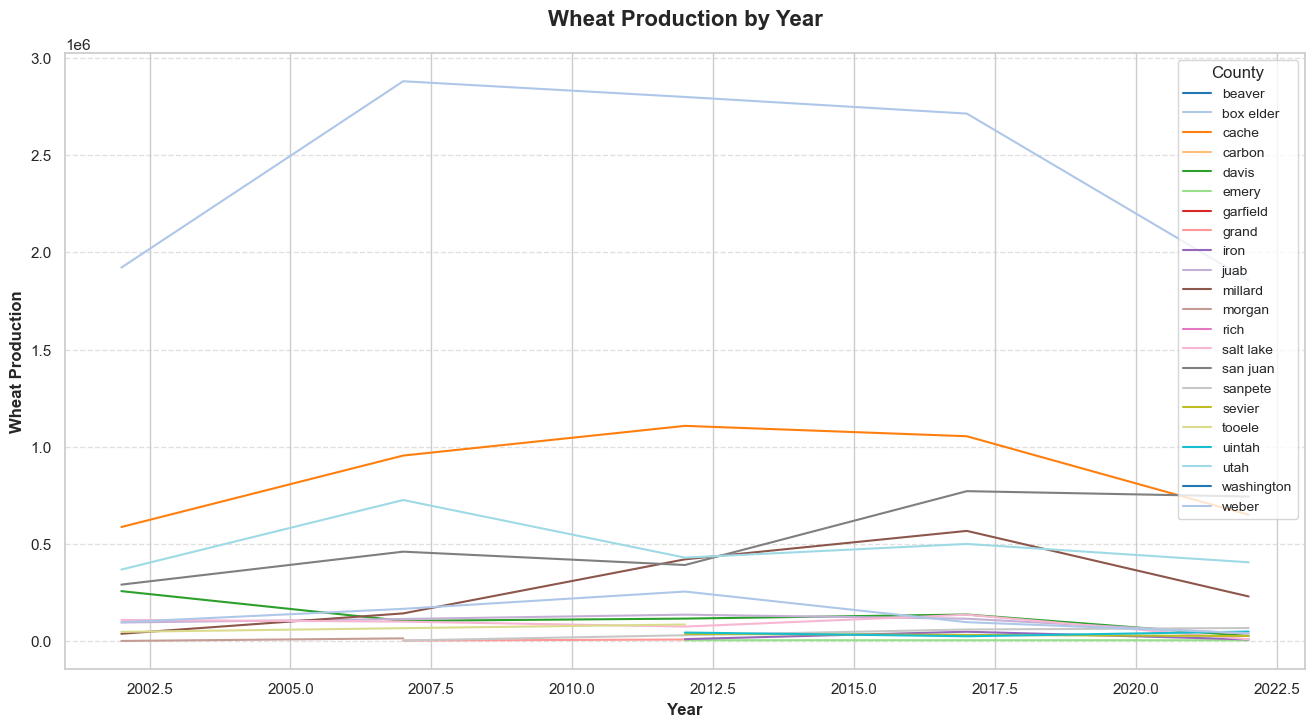

In [94]:
# line plot of wheat production by year for each county
plt.figure(figsize=(16,8))
sns.lineplot(x='year', y='wheatprod', hue='county', palette='tab20',data=df_labeled)
plt.title("Wheat Production by Year", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Wheat Production", fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='County', title_fontsize='12', fontsize='10', loc='upper right')
plt.show()



In [184]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tqdm import tqdm
import pickle

In [193]:
# make the x variable all features except wheatprod
X = df_labeled.loc[:, (df_labeled.columns != 'wheatprod') & (df_labeled.columns != 'county')]
y = df_labeled['wheatprod']

# scale the X variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# create a dictionary of models
models = {
    'OLS': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Elastic Net': ElasticNet(),
    'XGBoost': xgb.XGBRegressor(),
    'Random Forest': RandomForestRegressor(),
    'GBR': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Bagging': BaggingRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'MLP': MLPRegressor()
}

# create a dictionary to store the results
results = {}

# loop through the models
loop = tqdm(models.items(), total=len(models), colour='red')
# get the metrics for each model on both the training and testing sets
for name, model in loop:
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    results[name] = {
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred)
    }
    loop.set_description(f"Processing {name}")
    loop.refresh()
loop.close()

# create a DataFrame from the results dictionary
results_df = pd.DataFrame(results).T
results_df

Processing OLS:   0%|          | 0/13 [00:00<?, ?it/s]c:\Users\summe\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.042e+11, tolerance: 1.601e+09
  model = cd_fast.enet_coordinate_descent(
Processing Decision Tree:  85%|████████▍ | 11/13 [00:01<00:00,  7.48it/s]c:\Users\summe\anaconda3\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Processing MLP: 100%|██████████| 13/13 [00:01<00:00,  8.70it/s]          


,Train MAE,Test MAE,Train R2,Test R2
OLS,3.596402e-09,670679.167164,1.000000,-0.968892
Lasso,4.168827e+04,239274.757384,0.987030,0.876826
Ridge,5.962700e+04,194338.159271,0.969081,0.920150
Elastic Net,1.151494e+05,260598.788948,0.883631,0.800099
XGBoost,3.883089e-02,40626.539673,1.000000,0.991584
Random Forest,2.257603e+04,118331.464286,0.980776,0.903889
GBR,9.871378e+01,76918.355588,1.000000,0.947252
AdaBoost,3.070410e+04,166894.508390,0.994963,0.866357
Bagging,3.742538e+04,88534.692857,0.960442,0.948147
SVR,3.001626e+05,466456.634226,-0.197348,-0.172710


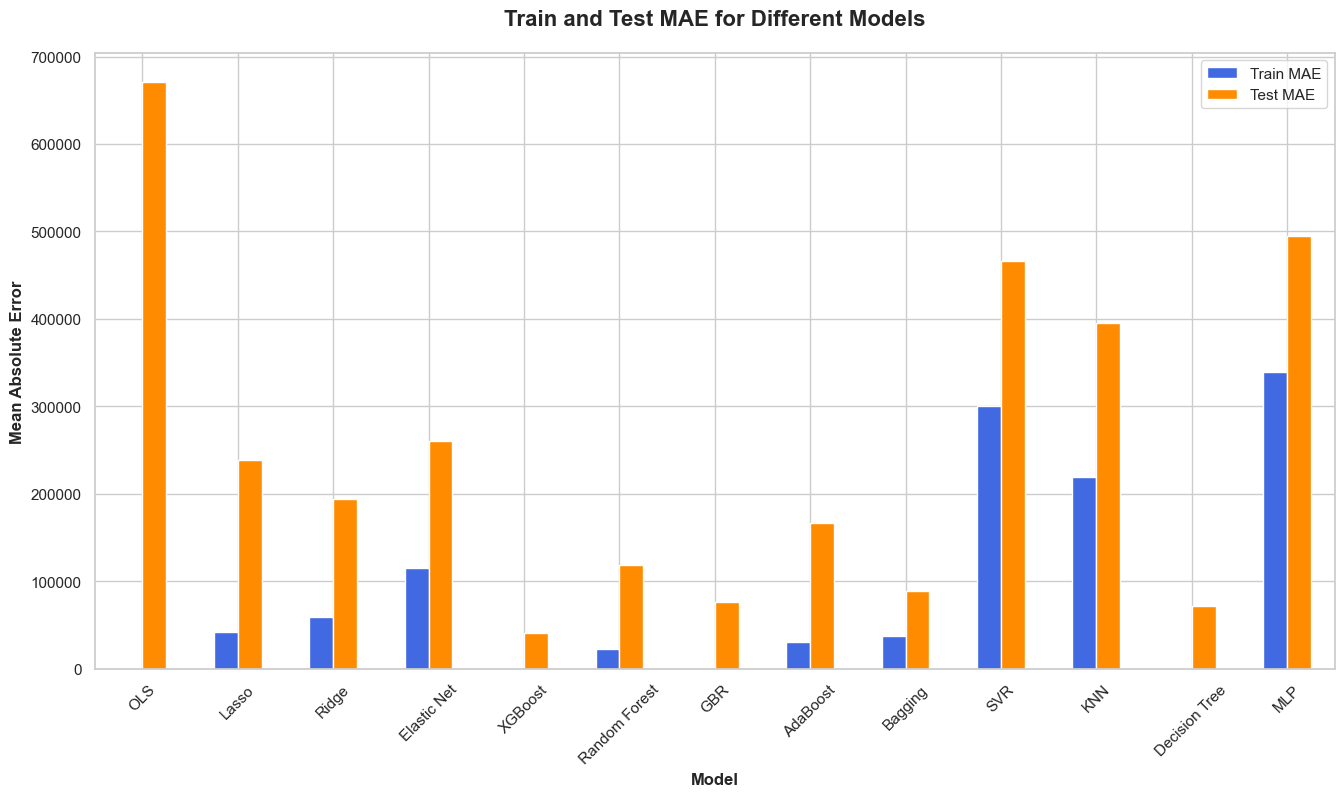

In [200]:
# plot the results for the train and test MAE
results_df[['Train MAE', 'Test MAE']].plot(kind='bar', color=['royalblue', 'darkorange'], figsize=(16,8))
plt.title("Train and Test MAE for Different Models", fontsize=16, fontweight='bold', pad=20)
plt.ylabel("Mean Absolute Error", fontsize=12, fontweight='bold')
plt.xlabel("Model", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

100%|██████████| 10/10 [00:06<00:00,  1.52it/s]


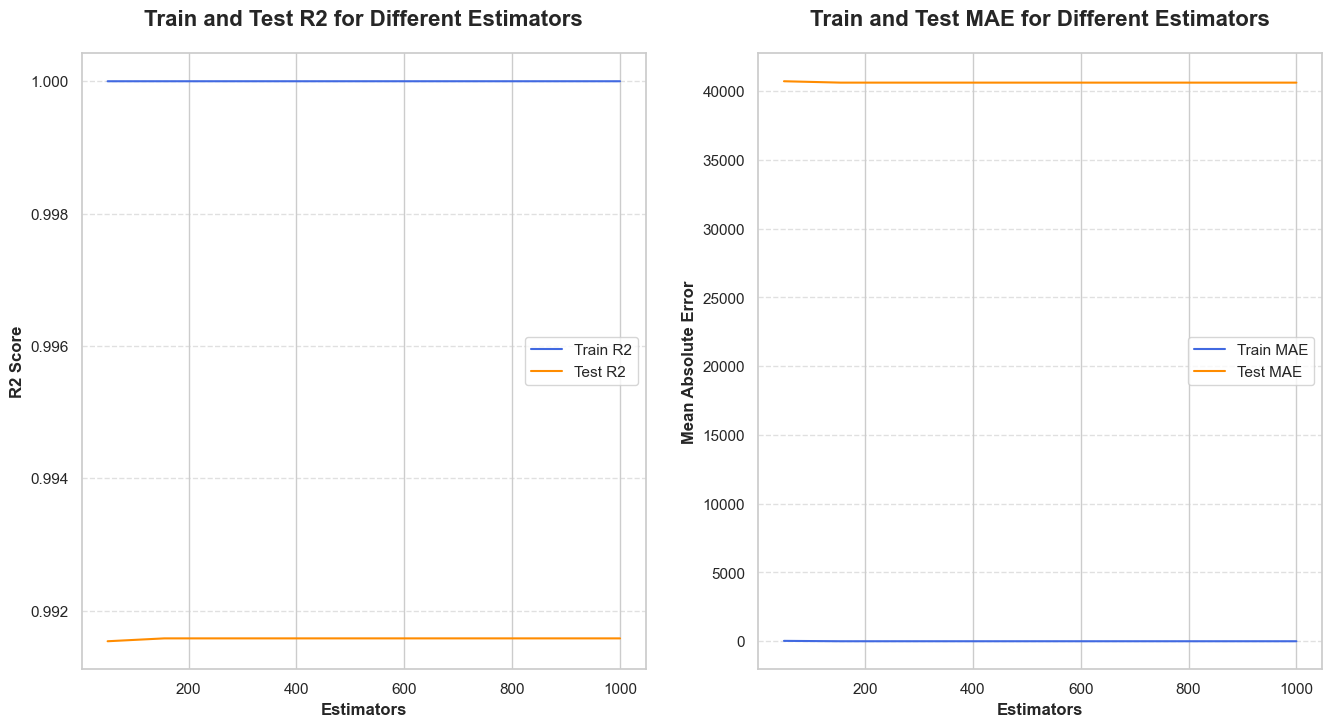

In [213]:
# Fine tune the estimators hyperparameter for the XGBoost model
xgb_model = xgb.XGBRegressor()
estimators_list = np.linspace(50, 1000, 10, dtype=int)
train_r2_estimators = []
test_r2_estimators = []
train_mae_estimators = []
test_mae_estimators = []
for estimator in tqdm(estimators_list, colour='red'):
    xgb_model.set_params(n_estimators=estimator)
    xgb_model.fit(X_train, y_train)
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)
    train_r2_estimators.append(r2_score(y_train, y_train_pred))
    test_r2_estimators.append(r2_score(y_test, y_test_pred))
    train_mae_estimators.append(mean_absolute_error(y_train, y_train_pred))
    test_mae_estimators.append(mean_absolute_error(y_test, y_test_pred))

def create_table_plot(hyper_parameter_list, hyper_param_name, train_r2_estimators, test_r2_estimators, train_mae_estimators, test_mae_estimators):
    # create a table
    estimators_df = pd.DataFrame({
        f'{hyper_param_name}': hyper_parameter_list,
        'Train R2': train_r2_estimators,
        'Test R2': test_r2_estimators,
        'Train MAE': train_mae_estimators,
        'Test MAE': test_mae_estimators
    })


    # plot the results
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    estimators_df.plot(x=f'{hyper_param_name}', y=['Train R2', 'Test R2'], ax=ax[0], color=['royalblue', 'darkorange'])
    ax[0].set_title(f"Train and Test R2 for Different {hyper_param_name}", fontsize=16, fontweight='bold', pad=20)
    ax[0].set_ylabel("R2 Score", fontsize=12, fontweight='bold')
    ax[0].set_xlabel(f"{hyper_param_name}", fontsize=12, fontweight='bold')
    ax[0].grid(axis='y', linestyle='--', alpha=0.6)
    estimators_df.plot(x=f'{hyper_param_name}', y=['Train MAE', 'Test MAE'], ax=ax[1], color=['royalblue', 'darkorange'])
    ax[1].set_title(f"Train and Test MAE for Different {hyper_param_name}", fontsize=16, fontweight='bold', pad=20)
    ax[1].set_ylabel("Mean Absolute Error", fontsize=12, fontweight='bold')
    ax[1].set_xlabel(f"{hyper_param_name}", fontsize=12, fontweight='bold')
    ax[1].grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

    return estimators_df

estimators_df = create_table_plot(estimators_list, 'Estimators', train_r2_estimators, test_r2_estimators, train_mae_estimators, test_mae_estimators)

In [217]:
best_n_estimators = estimators_df.loc[estimators_df['Test MAE'].idxmin(), 'Estimators']
print(f"The best number of estimators is: {best_n_estimators}")

The best number of estimators is: 1000


100%|██████████| 20/20 [00:24<00:00,  1.21s/it]


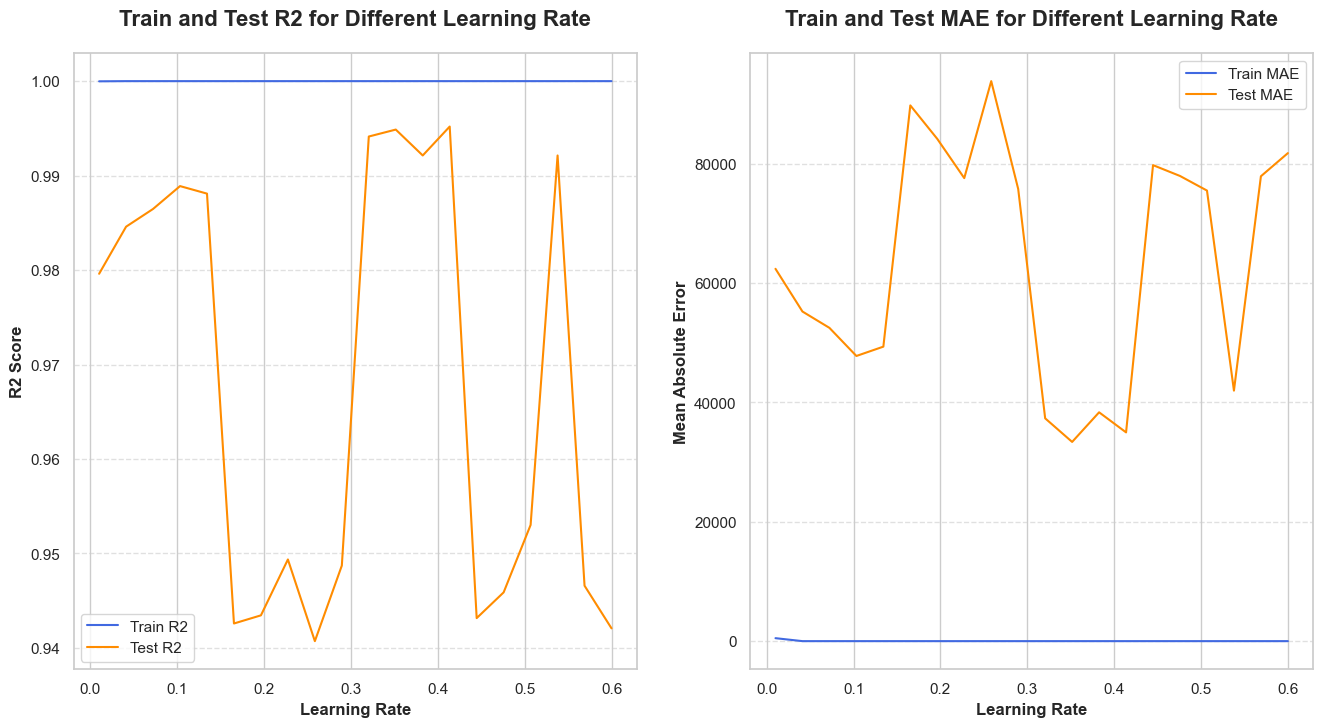

In [216]:
# fine tune the learning rate hyperparameter for the XGBoost model
xgb_model = xgb.XGBRegressor()
learning_rate_list = np.linspace(0.01, 0.6, 20)
train_r2_learning_rate = []
test_r2_learning_rate = []
train_mae_learning_rate = []
test_mae_learning_rate = []
for rate in tqdm(learning_rate_list, colour='red'):
    xgb_model.set_params(n_estimators=1000 ,learning_rate=rate)
    xgb_model.fit(X_train, y_train)
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)
    train_r2_learning_rate.append(r2_score(y_train, y_train_pred))
    test_r2_learning_rate.append(r2_score(y_test, y_test_pred))
    train_mae_learning_rate.append(mean_absolute_error(y_train, y_train_pred))
    test_mae_learning_rate.append(mean_absolute_error(y_test, y_test_pred))

learning_rate_df = create_table_plot(learning_rate_list, 'Learning Rate', train_r2_learning_rate, test_r2_learning_rate, train_mae_learning_rate, test_mae_learning_rate)

In [218]:
best_learning_rate = learning_rate_df.loc[learning_rate_df['Test MAE'].idxmin(), 'Learning Rate']
print(f"The best learning rate is: {best_learning_rate}")

The best learning rate is: 0.35157894736842105


100%|██████████| 20/20 [00:29<00:00,  1.50s/it]


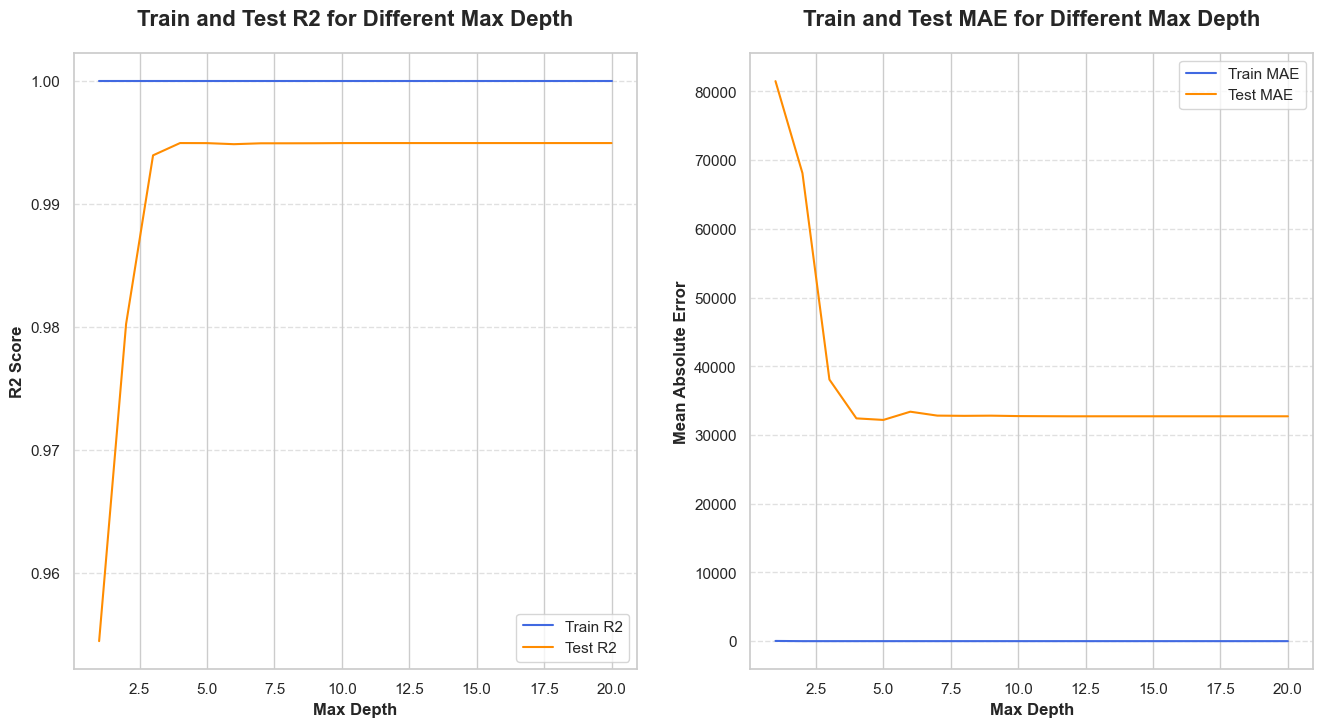

In [220]:
# fine tune the max depth hyperparameter for the XGBoost model
xgb_model = xgb.XGBRegressor()
max_depth_list = np.linspace(1, 20, 20, dtype=int)
train_r2_max_depth = []
test_r2_max_depth = []
train_mae_max_depth = []
test_mae_max_depth = []
for depth in tqdm(max_depth_list, colour='red'):
    xgb_model.set_params(n_estimators=best_n_estimators, learning_rate=best_learning_rate, max_depth=depth)
    xgb_model.fit(X_train, y_train)
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)
    train_r2_max_depth.append(r2_score(y_train, y_train_pred))
    test_r2_max_depth.append(r2_score(y_test, y_test_pred))
    train_mae_max_depth.append(mean_absolute_error(y_train, y_train_pred))
    test_mae_max_depth.append(mean_absolute_error(y_test, y_test_pred))
max_depth_df = create_table_plot(max_depth_list, 'Max Depth', train_r2_max_depth, test_r2_max_depth, train_mae_max_depth, test_mae_max_depth)


In [221]:
best_max_depth = max_depth_df.loc[max_depth_df['Test MAE'].idxmin(), 'Max Depth']
print(f"The best max depth is: {best_max_depth}")

The best max depth is: 5


100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


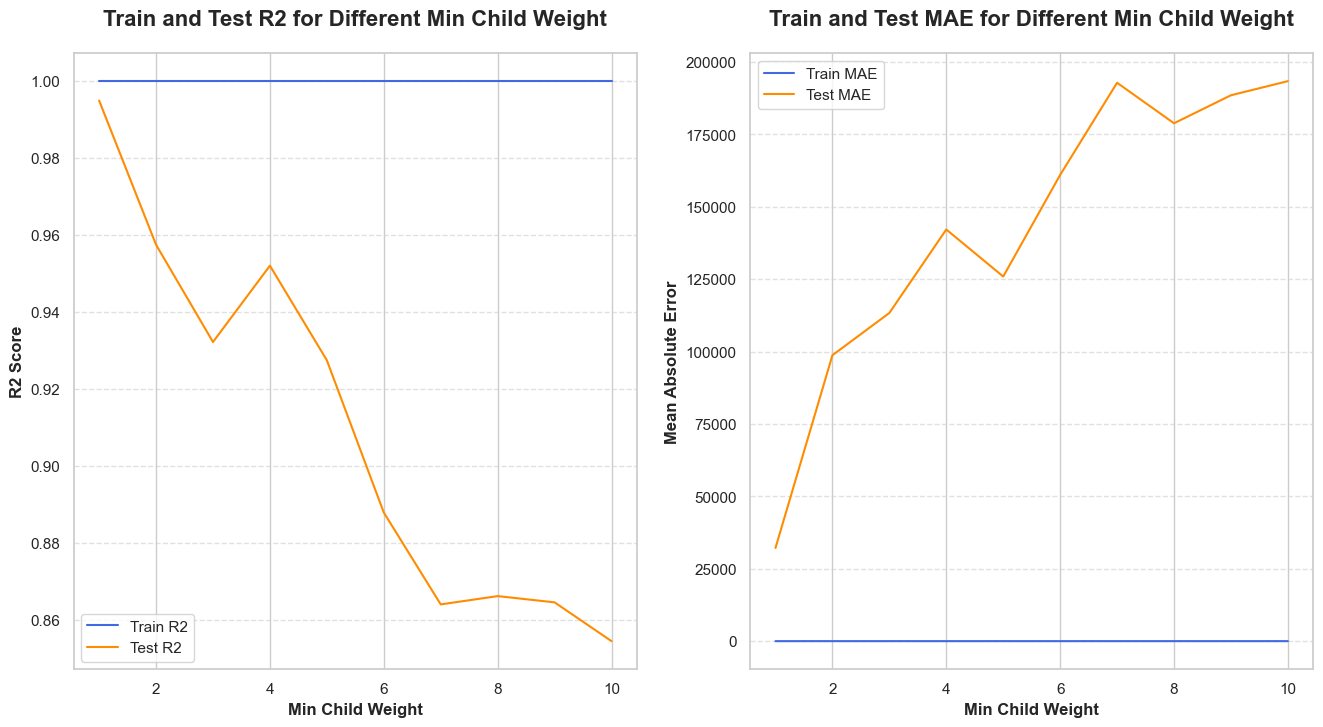

In [222]:
# fine tune the min child weight hyperparameter for the XGBoost model
xgb_model = xgb.XGBRegressor()
min_child_weight_list = np.linspace(1, 10, 10, dtype=int)
train_r2_min_child_weight = []
test_r2_min_child_weight = []
train_mae_min_child_weight = []
test_mae_min_child_weight = []
for weight in tqdm(min_child_weight_list, colour='red'):
    xgb_model.set_params(n_estimators=best_n_estimators, learning_rate=best_learning_rate, max_depth=best_max_depth, min_child_weight=weight)
    xgb_model.fit(X_train, y_train)
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)
    train_r2_min_child_weight.append(r2_score(y_train, y_train_pred))
    test_r2_min_child_weight.append(r2_score(y_test, y_test_pred))
    train_mae_min_child_weight.append(mean_absolute_error(y_train, y_train_pred))
    test_mae_min_child_weight.append(mean_absolute_error(y_test, y_test_pred))
min_child_weight_df = create_table_plot(min_child_weight_list, 'Min Child Weight', train_r2_min_child_weight, test_r2_min_child_weight, train_mae_min_child_weight, test_mae_min_child_weight)

In [223]:
best_min_child_weight = min_child_weight_df.loc[min_child_weight_df['Test MAE'].idxmin(), 'Min Child Weight']
print(f"The best min child weight is: {best_min_child_weight}")

The best min child weight is: 1


100%|██████████| 10/10 [00:04<00:00,  2.13it/s]


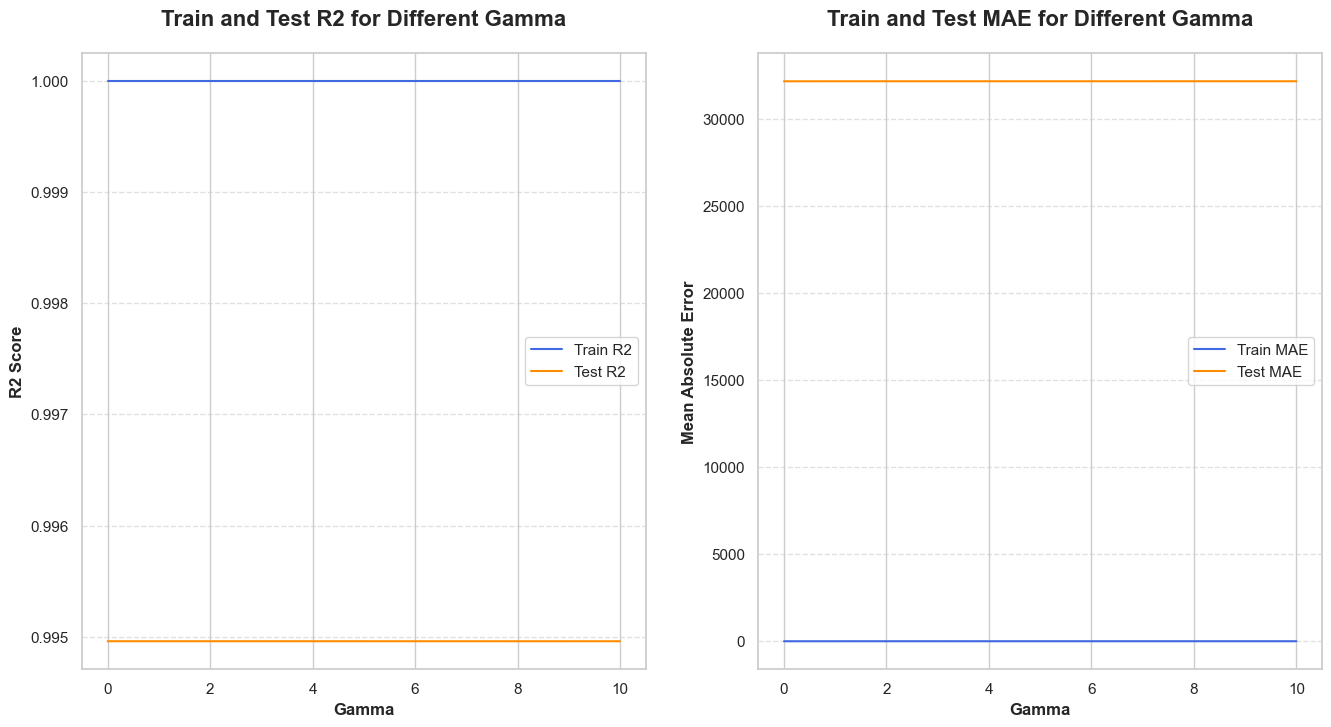

In [224]:
# fine tune the gamma hyperparameter for the XGBoost model
xgb_model = xgb.XGBRegressor()
gamma_list = np.linspace(0, 10, 10)
train_r2_gamma = []
test_r2_gamma = []
train_mae_gamma = []
test_mae_gamma = []
for gamma in tqdm(gamma_list, colour='red'):
    xgb_model.set_params(n_estimators=best_n_estimators, learning_rate=best_learning_rate, max_depth=best_max_depth, min_child_weight=best_min_child_weight, gamma=gamma)
    xgb_model.fit(X_train, y_train)
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)
    train_r2_gamma.append(r2_score(y_train, y_train_pred))
    test_r2_gamma.append(r2_score(y_test, y_test_pred))
    train_mae_gamma.append(mean_absolute_error(y_train, y_train_pred))
    test_mae_gamma.append(mean_absolute_error(y_test, y_test_pred))
gamma_df = create_table_plot(gamma_list, 'Gamma', train_r2_gamma, test_r2_gamma, train_mae_gamma, test_mae_gamma)

In [225]:
best_gamma = gamma_df.loc[gamma_df['Test MAE'].idxmin(), 'Gamma']
print(f"The best gamma is: {best_gamma}")


The best gamma is: 0.0


100%|██████████| 10/10 [00:09<00:00,  1.03it/s]


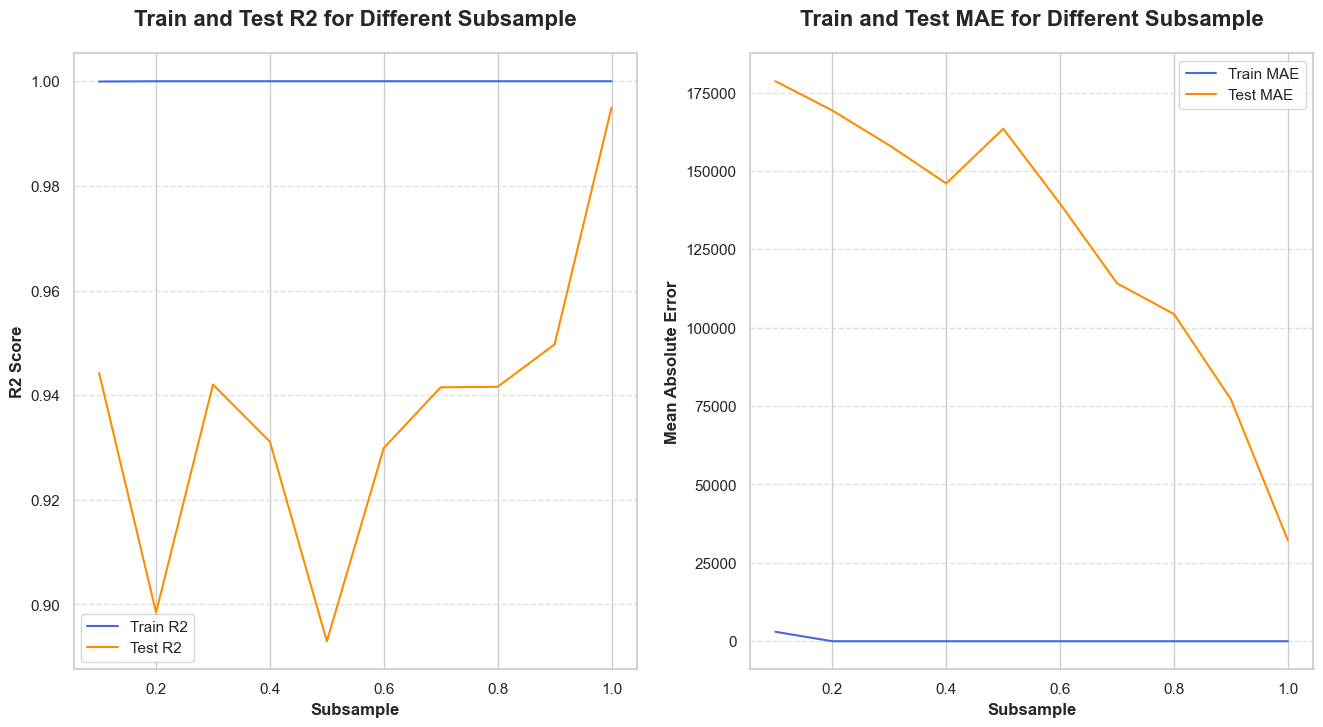

In [226]:
# fine tune the subsample hyperparameter for the XGBoost model
xgb_model = xgb.XGBRegressor()
subsample_list = np.linspace(0.1, 1, 10)
train_r2_subsample = []
test_r2_subsample = []
train_mae_subsample = []
test_mae_subsample = []
for subsample in tqdm(subsample_list, colour='red'):
    xgb_model.set_params(n_estimators=best_n_estimators, learning_rate=best_learning_rate, max_depth=best_max_depth, min_child_weight=best_min_child_weight, gamma=best_gamma, subsample=subsample)
    xgb_model.fit(X_train, y_train)
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)
    train_r2_subsample.append(r2_score(y_train, y_train_pred))
    test_r2_subsample.append(r2_score(y_test, y_test_pred))
    train_mae_subsample.append(mean_absolute_error(y_train, y_train_pred))
    test_mae_subsample.append(mean_absolute_error(y_test, y_test_pred))
subsample_df = create_table_plot(subsample_list, 'Subsample', train_r2_subsample, test_r2_subsample, train_mae_subsample, test_mae_subsample)

In [227]:
best_subsample = subsample_df.loc[subsample_df['Test MAE'].idxmin(), 'Subsample']
print(f"The best subsample is: {best_subsample}")

The best subsample is: 1.0


100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


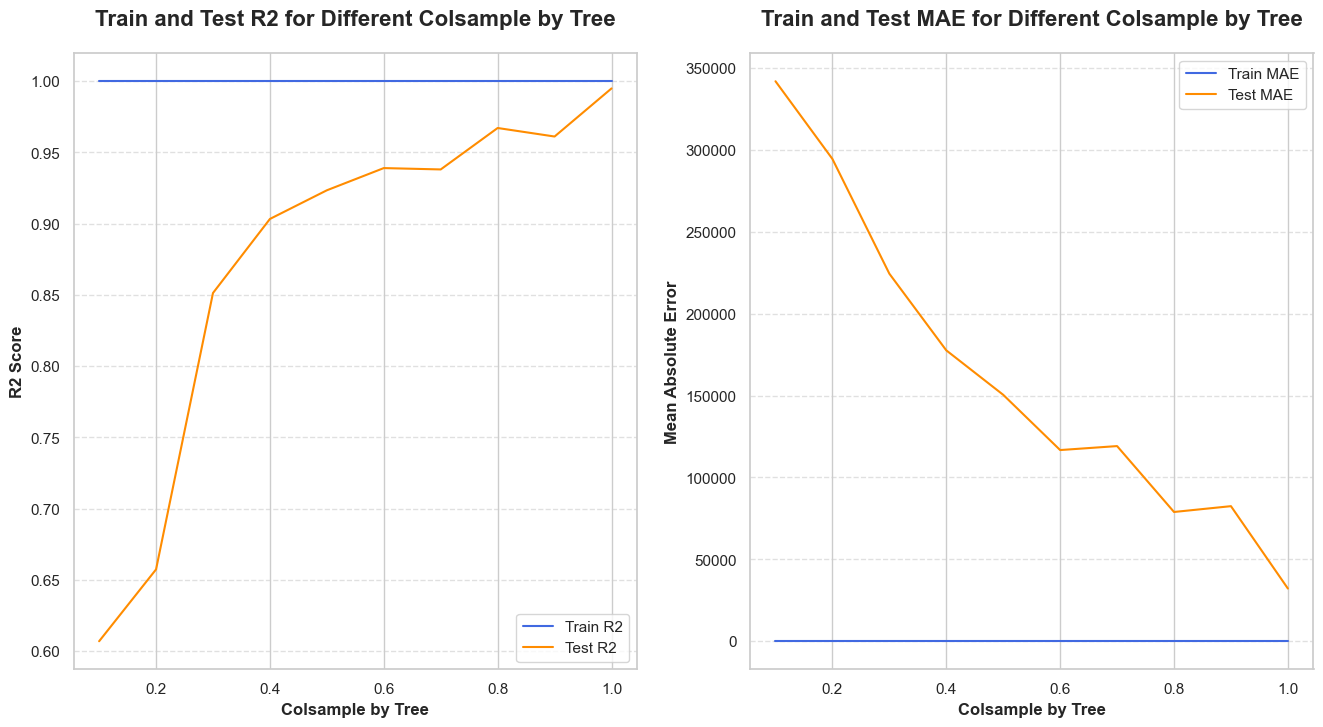

In [228]:
# fine tune the colsample by tree hyperparameter for the XGBoost model
xgb_model = xgb.XGBRegressor()
colsample_bytree_list = np.linspace(0.1, 1, 10)
train_r2_colsample_bytree = []
test_r2_colsample_bytree = []
train_mae_colsample_bytree = []
test_mae_colsample_bytree = []
for colsample_bytree in tqdm(colsample_bytree_list, colour='red'):
    xgb_model.set_params(n_estimators=best_n_estimators, learning_rate=best_learning_rate, max_depth=best_max_depth, min_child_weight=best_min_child_weight, gamma=best_gamma, subsample=best_subsample, colsample_bytree=colsample_bytree)
    xgb_model.fit(X_train, y_train)
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)
    train_r2_colsample_bytree.append(r2_score(y_train, y_train_pred))
    test_r2_colsample_bytree.append(r2_score(y_test, y_test_pred))
    train_mae_colsample_bytree.append(mean_absolute_error(y_train, y_train_pred))
    test_mae_colsample_bytree.append(mean_absolute_error(y_test, y_test_pred))
colsample_bytree_df = create_table_plot(colsample_bytree_list, 'Colsample by Tree', train_r2_colsample_bytree, test_r2_colsample_bytree, train_mae_colsample_bytree, test_mae_colsample_bytree)

In [229]:
best_colsample_bytree = colsample_bytree_df.loc[colsample_bytree_df['Test MAE'].idxmin(), 'Colsample by Tree']
print(f"The best colsample by tree is: {best_colsample_bytree}")

The best colsample by tree is: 1.0


In [230]:
# fine tuned xgboost hyper params
xgb_model = xgb.XGBRegressor(n_estimators=best_n_estimators, learning_rate=best_learning_rate, max_depth=best_max_depth, min_child_weight=best_min_child_weight, gamma=best_gamma, subsample=best_subsample, colsample_bytree=best_colsample_bytree)
xgb_model.fit(X_train, y_train)
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")

Train MAE: 0.03350898197719029
Test MAE: 32190.223824637276
Train R2: 0.9999999999999784
Test R2: 0.9949583946295378


In [236]:
# save the model 
if not os.path.exists('models'):
    os.makedirs('models')
with open('models/agricultural_census_model_xgb.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)